In [1]:
!pip install sklearn
!pip install seaborn
!pip install pandas

In [1]:
import sys
sys.path

['/home/qcraft/Documents/Fan/project',
 '/home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python37.zip',
 '/home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7',
 '/home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/lib-dynload',
 '',
 '/home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages',
 '/home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/IPython/extensions',
 '/home/qcraft/.ipython']

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from math import sqrt

In [23]:
def mape(y_true, y_pred):
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

In [24]:

df = pd.read_csv('CER.csv')
train = df.loc[:,['holidays', 'Hour', 'Month', 'Temperature', 'humiduity', 'Wind_speed']]
target = df["SYSLoad"]
print(train.head)
print(target.head)
x_train,x_test,y_train,y_test = train_test_split(train,target,test_size=0.01305,random_state=42)

mm = MinMaxScaler()
ss = StandardScaler()
X_train = mm.fit_transform(x_train)
X_test = mm.transform(x_test)
print(len(X_train), len(X_test))


<bound method NDFrame.head of        holidays  Hour  Month  Temperature  humiduity  Wind_speed
0             0   0.0      7        11.80       93.0        14.4
1             0   0.5      7        11.80       91.0        14.4
2             0   1.0      7        11.80       89.0        18.0
3             0   1.5      7        11.60       91.0        18.0
4             0   2.0      7        11.40       93.0        10.8
...         ...   ...    ...          ...        ...         ...
25723         1  21.5     12         5.55       87.5         7.2
25724         1  22.0     12         5.60       86.0        10.8
25725         1  22.5     12         5.60       85.0        10.8
25726         1  23.0     12         5.60       84.0        10.8
25727         1  23.5     12         5.60       84.0        10.8

[25728 rows x 6 columns]>
<bound method NDFrame.head of 0        464.058
1        400.316
2        353.643
3        320.181
4        293.990
          ...   
25723    803.117
25724    762.2

"\ndataset = pd.read_csv('CER.csv', header=0, index_col=0)\ndataset = dataset.loc[:, ['SYSLoad', 'holidays', 'Hour', 'Days', \n                          'Month', 'Temperature', 'humiduity', 'Wind_speed']]\n                          \n \nvalues = dataset.values\nsplit_point = 529 * 48\ntrain = values[:split_point, :]\ntest = values[split_point:, :]\ntrain_X, train_y = train[:, 1:], train[:, 0]\ntest_X, test_y = test[:, 1:], test[:, 0]\n\nmm = MinMaxScaler()\nX_train = mm.fit_transform(train_X)\nX_test = mm.transform(test_X)\n\nprint(len(X_train), len(X_test))\n"

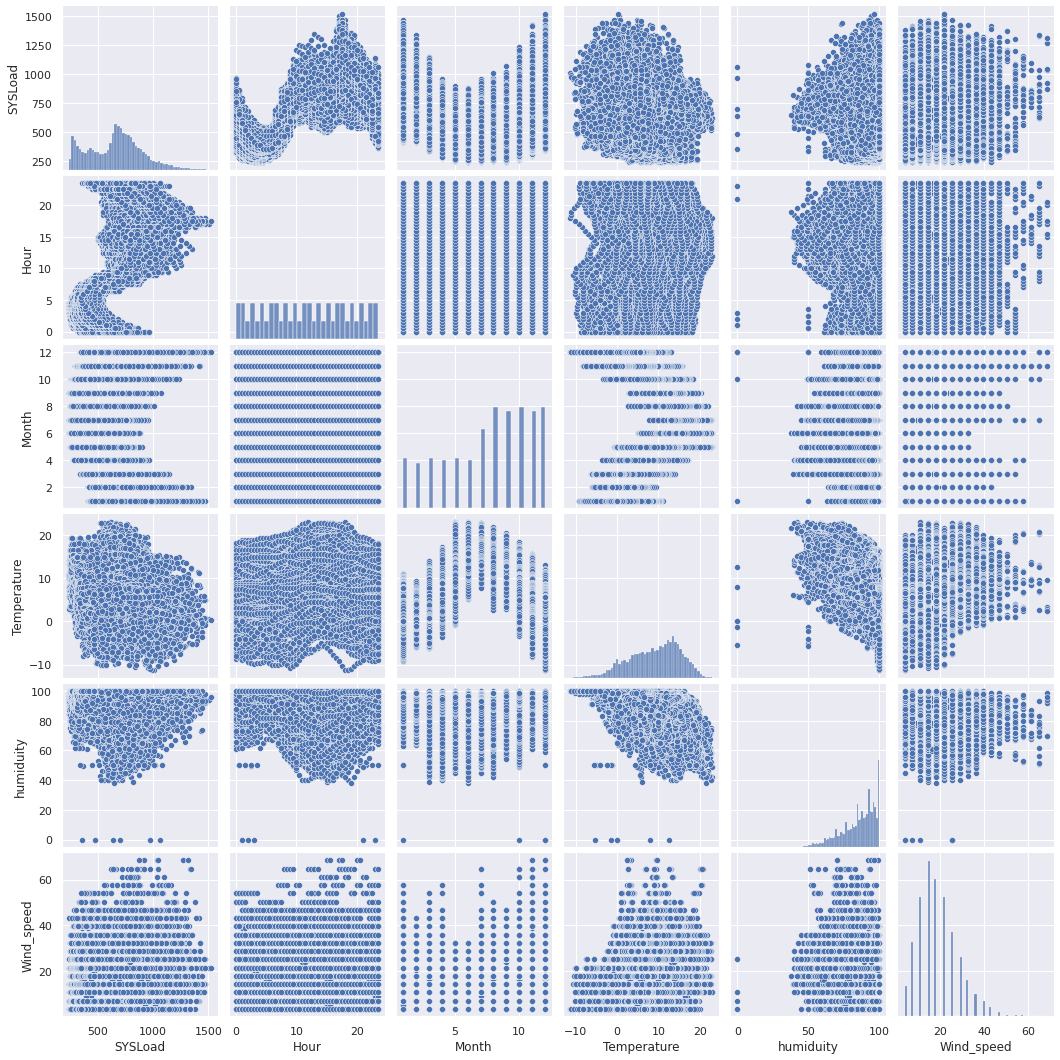

In [19]:
df = df.loc[:,['SYSLoad', 'Hour', 'Month', 'Temperature', 'humiduity', 'Wind_speed']]
sns.pairplot(df)

/home/qcraft/Documents/Fan/miniconda3/envs/py37/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


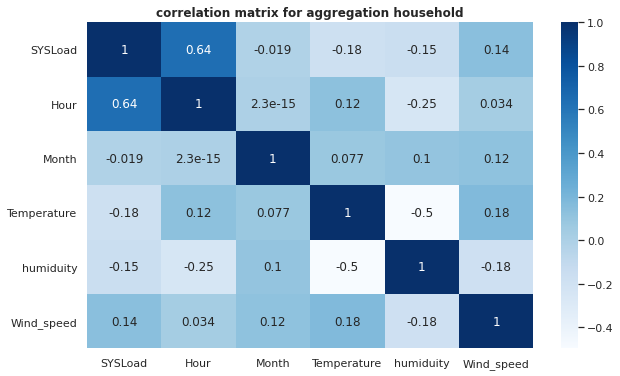

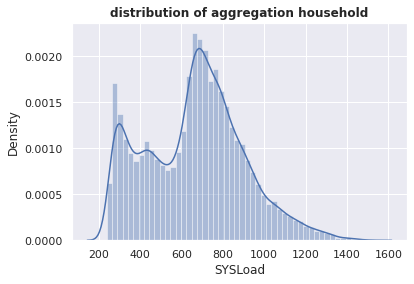

In [20]:
font1 = {
        'weight':'bold',
        'size':12,}

corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, cmap='Blues',annot=True)
plt.title('correlation matrix for aggregation household', font1)
plt.savefig('correlation matrix for aggregation household')

plt.figure(figsize=(6,4))
plt.title('distribution of aggregation household', font1)
sns.distplot(df['SYSLoad'])
plt.savefig('distribution of aggregation household')

In [15]:
from sklearn.model_selection import GridSearchCV
params = [{'gamma':[55, 65, 75, 85, 95],'C':[450, 550, 650, 750,850, 950]}]
GS_SVR = GridSearchCV(SVR(kernel='rbf'), param_grid = params, refit=True, cv=5, verbose=1, n_jobs=15)
GS_SVR.fit(X_train, y_train)
pd.DataFrame(GS_SVR.cv_results_)
print(GS_SVR.best_score_)
print(GS_SVR.best_params_)

ValueError: Found input variables with inconsistent numbers of samples: [25392, 23155]

In [6]:
from sklearn.model_selection import RandomizedSearchCV
param_distribs= {
    "C": np.arange(1, 2000).tolist(),
    "gamma": np.arange(1,200).tolist(),
}
RS_SVR =RandomizedSearchCV(SVR(kernel='rbf'),param_distribs, refit=True, cv=5, verbose=1, n_jobs=15)
RS_SVR.fit(X_train, y_train)
pd.DataFrame(RS_SVR.cv_results_)
print('score:', RS_SVR.best_score_)
print(RS_SVR.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
score: 0.9430884915996731
{'gamma': 121, 'C': 484}


Test RMSE: 61.909
Test MAE: 37.746
Test MAPE: 0.057


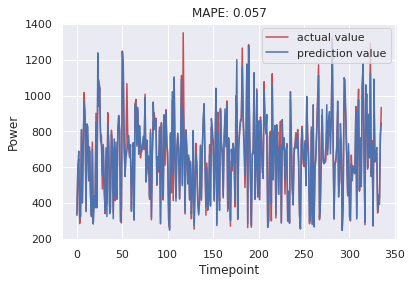

In [25]:
'''
score_dict = {
['C': 1550, 'gamma': 100, ‘mae’:36.40553476228768, 'mape':5.578057581176214]
['C': 1525, 'gamma': 90, 'score':0.941548305701799，‘mae’:36.503036327722576, 'mape':5.608438862896302]
['C': 1520, 'gamma': 85, 'score':0.94160466930391, ‘mae’:36.683843532129956, 'mape':5.644404556927005]
['C': 1500, 'gamma': 100, ‘mae’:36.38857667694246, 'mape':5.576559418673901]
['C': 1500, 'gamma': 80,  'score':0.9415016496360338, ‘mae’:36.38857667694246, 'mape':5.576559418673901]
['C': 1510, 'gamma': 87,  'score':0.9416310342120807, ]
['C': 1495, 'gamma': 87,  'score':0.9416582410092952]
['C': 1450, 'gamma': 87,  'score':0.94174185466009]
['C': 1100, 'gamma': 88,  'score':0.9423105564292422]
['C': 900,  'gamma': 100, 'score':0.9428214096411096]
['C': 850,  'gamma': 95,  'score':0.9428124110760792]
['C': 588,  'gamma': 105, 'score'0.9431809364489869]}

linear_svr = SVR(kernel = 'linear')
linear_svr.fit(X_train, y_train)
linear_svr_y_pred = linear_svr.predict(X_test)
print(metrics.mean_absolute_error(y_test,linear_svr_y_pred))
print(mape(y_test, linear_svr_y_pred))

poly_svr = SVR(kernel = 'poly')
poly_svr.fit(X_train, y_train)
poly_svr_y_pred = poly_svr.predict(X_test)
print(metrics.mean_absolute_error(y_test, poly_svr_y_pred))
print(mape(y_test,poly_svr_y_pred))
'''
from sklearn.svm import SVR
rbf_svr = SVR(kernel = 'rbf', gamma=105, C=588)
rbf_svr.fit(X_train, y_train)
rbf_svr_y_pred = rbf_svr.predict(X_test)
mae = metrics.mean_absolute_error(y_test, rbf_svr_y_pred)
mape = metrics.mean_absolute_percentage_error(y_test,rbf_svr_y_pred)
rmse = rmse = sqrt(mean_squared_error(y_test,rbf_svr_y_pred))
print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)

plt.plot(range(len(y_test)), y_test, c='r', label='actual value')
plt.plot(range(len(rbf_svr_y_pred)), rbf_svr_y_pred, c='b', label='prediction value')
plt.grid(True)
plt.legend()
plt.title('MAPE: %.3f' % mape)
plt.xlabel('Timepoint')
plt.ylabel('Power')
plt.show()


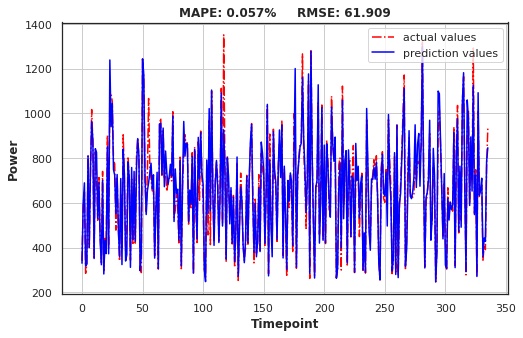

In [28]:
sns.set_style('white')
font1 = {
        'weight':'bold',
        'size':12,}
plt.figure(figsize=(8, 5))
plt.plot(range(len(y_test)), y_test, ls='-.', c='red', label='actual values')
plt.plot(range(len(rbf_svr_y_pred)), rbf_svr_y_pred, ls='-', c='blue', label='prediction values')
plt.grid(True)
plt.legend()
plt.title('MAPE: %.3f%%' % mape + '     ' + 'RMSE: %.3f' % rmse, font1)
plt.xlabel('Timepoint', font1)
plt.ylabel('Power', font1)
plt.savefig('SVR_aggregation_results')
plt.show()